In [ ]:
## Lending Loan Case Study

In [59]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Loading the loan dataset and data dictionary
loan_data_path = 'loan.csv'
data_dictionary_path = 'Data_Dictionary.xlsx'


In [35]:
# Load the data files
loan_df = pd.read_csv(loan_data_path, low_memory=False)
data_dictionary = pd.read_excel(data_dictionary_path)

In [37]:
# Step 1: Display the first few rows of the loan dataset
print("First few rows of the dataset:")
print(loan_df.head())

First few rows of the dataset:
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                Na

In [39]:
# Step 2: Display the dataset information
print("\nDataset Info:")
loan_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [41]:
# Step 3: Display the data dictionary
print("\nData Dictionary (first few rows):")
print(data_dictionary.head())


Data Dictionary (first few rows):
            LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...


In [45]:
# Step 4: Analyze the 'loan_status' column
print("\nUnique values in 'loan_status' and their counts:")
loan_status_counts = loan_df['loan_status'].value_counts()
print(loan_status_counts)


Unique values in 'loan_status' and their counts:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [49]:
# Step 5: Create the target variable 'default'
loan_df['default'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else (0 if x == 'Fully Paid' else np.nan))

In [51]:
# Step 6: Exclude 'Current' loans from the dataset
filtered_loan_df = loan_df[~loan_df['default'].isna()]

In [53]:
# Step 7: Check the distribution of the target variable
default_counts = filtered_loan_df['default'].value_counts(normalize=True) * 100
print("\nTarget variable ('default') distribution:")
print(default_counts)


Target variable ('default') distribution:
default
0.0    85.413588
1.0    14.586412
Name: proportion, dtype: float64


In [55]:
# Step 8: Display the shape of the filtered dataset
print("\nFiltered dataset shape:", filtered_loan_df.shape)


Filtered dataset shape: (38577, 112)


In [63]:
# ---- Data Cleaning ----
# Step 9: Remove columns with more than 50% missing values
threshold = 0.5 * filtered_loan_df.shape[0]
filtered_loan_df = filtered_loan_df.loc[:, filtered_loan_df.isnull().sum() < threshold]

In [65]:
# Step 10: Drop irrelevant columns
irrelevant_columns = ['id', 'member_id', 'desc', 'url', 'zip_code', 'emp_title']
filtered_loan_df = filtered_loan_df.drop(columns=irrelevant_columns, errors='ignore')

In [67]:

# Step 11: Fill missing values with median values for numerical columns
filtered_loan_df = filtered_loan_df.fillna(filtered_loan_df.median(numeric_only=True))

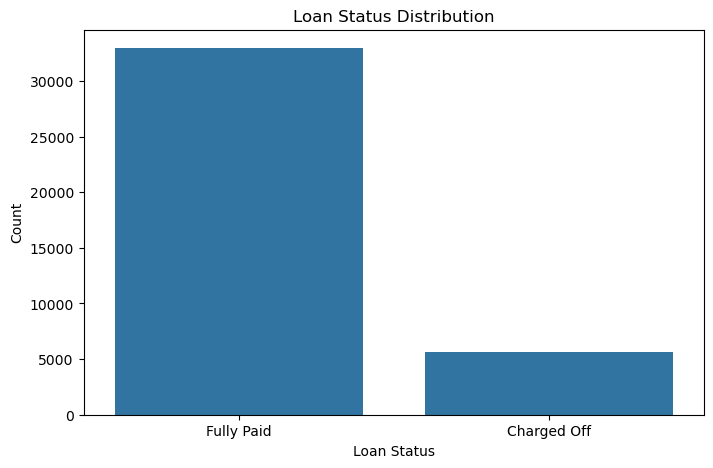

In [69]:
# Step 12: Visualize loan status distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_loan_df, x='loan_status', order=filtered_loan_df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.savefig('loan_status_distribution.png')
plt.show()

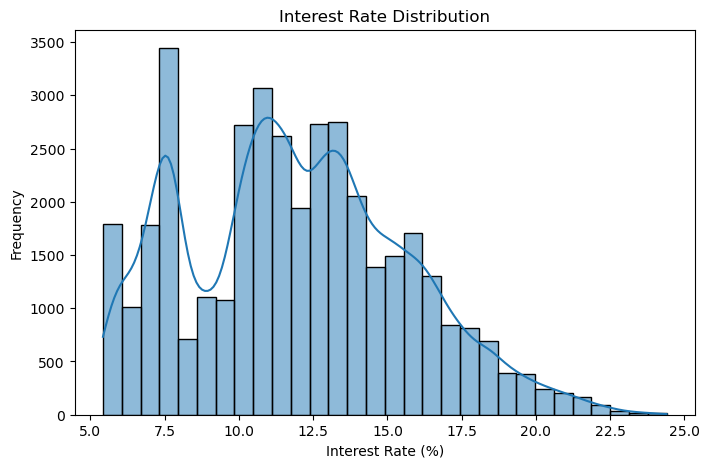

In [71]:
# Step 13: Visualize interest rate distribution
plt.figure(figsize=(8, 5))
sns.histplot(filtered_loan_df['int_rate'].str.rstrip('%').astype(float), bins=30, kde=True)
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.savefig('interest_rate_distribution.png')
plt.show()

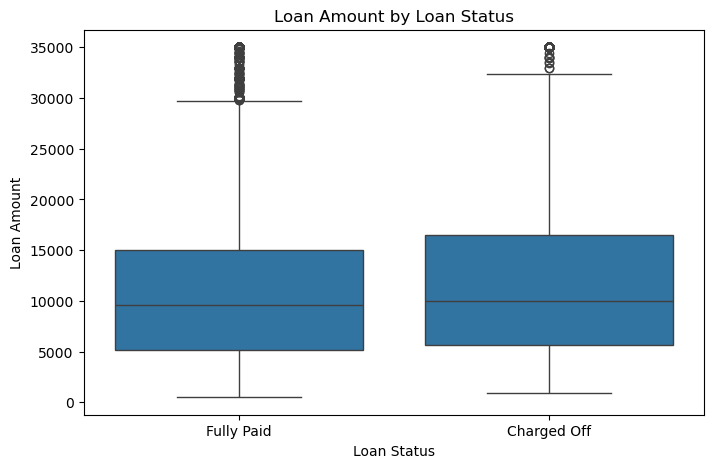

In [73]:
# Step 14: Analyze relationship between loan amount and loan status
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_loan_df, x='loan_status', y='loan_amnt', order=['Fully Paid', 'Charged Off'])
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.savefig('loan_amount_by_status.png')
plt.show()

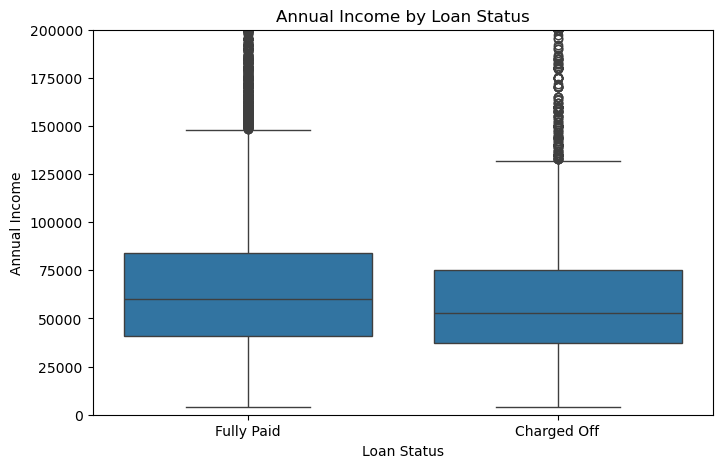

In [75]:
# Step 15: Analyze relationship between annual income and loan status
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_loan_df, x='loan_status', y='annual_inc', order=['Fully Paid', 'Charged Off'])
plt.title('Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.ylim(0, 200000)  # Limiting y-axis for better visibility
plt.savefig('annual_income_by_status.png')
plt.show()

In [77]:
print("Analysis completed")

Analysis completed
